In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as spec
import scipy.stats as st
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
data_dir = "https://raw.githubusercontent.com/chirayukong/infsci2725-spring-2018/master/assignment-03/Retention.txt"
df = pd.read_table(data_dir, sep="\t")
df.head()

,spend,apret,top10,rejr,tstsc,pacc,strat,salar
0,9855,52.50,15,29.474,65.063,36.887,12.0,60800
1,10527,64.25,36,22.309,71.063,30.970,12.8,63900
2,7904,37.75,26,25.853,60.750,41.985,20.3,57800
3,6601,57.00,23,11.296,67.188,40.289,17.0,51200
4,7251,62.00,17,22.635,56.250,46.780,18.1,48000


In [3]:
df.describe(include='all')

,spend,apret,top10,rejr,tstsc,pacc,strat,salar
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,10974.511765,56.721076,38.458824,30.654218,66.164165,43.173106,16.086471,61357.647059
std,5500.065580,18.077097,23.406393,17.098104,6.975306,13.105195,4.006503,9802.786457
min,4125.000000,18.750000,8.000000,0.000000,48.125000,8.964000,7.200000,38640.000000
25%,7371.750000,45.374750,22.000000,19.171000,61.111000,33.903750,13.400000,54650.000000
50%,9265.000000,55.708500,30.000000,27.390500,64.781500,40.850500,16.000000,61150.000000
75%,12838.000000,68.687500,49.500000,36.807500,70.453250,51.773250,18.575000,67100.000000
max,35863.000000,95.250000,98.000000,84.067000,87.500000,76.253000,29.200000,87900.000000


In [4]:
df.median()

spend     9265.0000
apret       55.7085
top10       30.0000
rejr        27.3905
tstsc       64.7815
pacc        40.8505
strat       16.0000
salar    61150.0000
dtype: float64

In [0]:
def hist_and_norm_test(predictor):
  sns.distplot(predictor, bins=20)
  
  z,pval = st.normaltest(predictor)
  if (pval < 0.05):
    title = 'P-value = %.2f, therefore it is not a normal distribution.'%pval
  else:
    title = 'P-value = %.2f, therefore it is a normal distribution.'%pval
  
  plt.title(title)

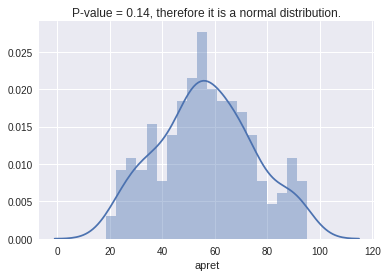

In [6]:
hist_and_norm_test(df.apret)

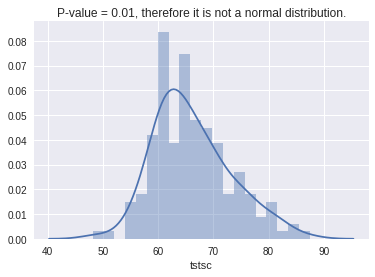

In [7]:
hist_and_norm_test(df.tstsc)

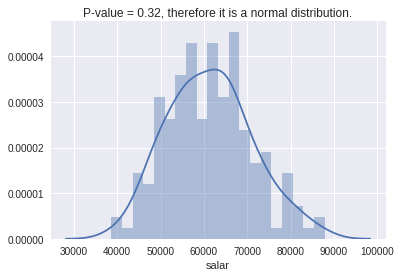

In [8]:
hist_and_norm_test(df.salar)

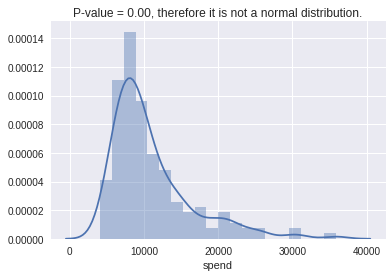

In [9]:
hist_and_norm_test(df.spend)

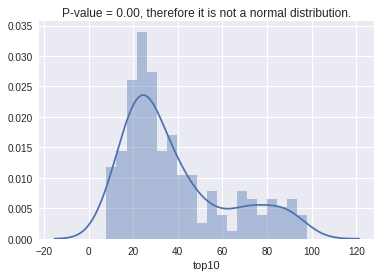

In [10]:
hist_and_norm_test(df.top10)

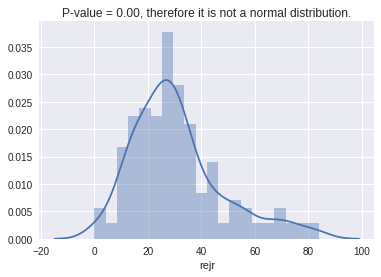

In [11]:
hist_and_norm_test(df.rejr)

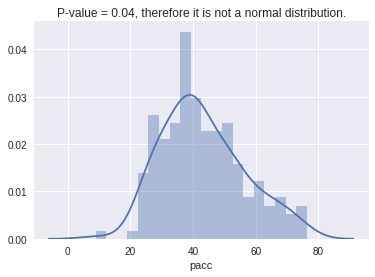

In [12]:
hist_and_norm_test(df.pacc)

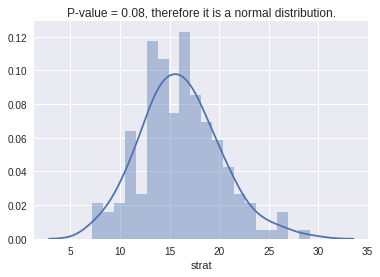

In [13]:
hist_and_norm_test(df.strat)

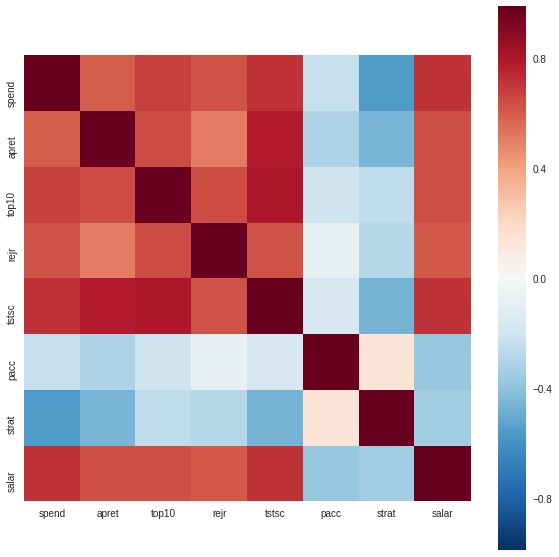

In [14]:
corrmat = df.corr(method='pearson')
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.99, square=True)

In [15]:
corrmat

,spend,apret,top10,rejr,tstsc,pacc,strat,salar
spend,1.000000,0.601231,0.675656,0.633544,0.714910,-0.236730,-0.561755,0.711838
apret,0.601231,1.000000,0.642464,0.514958,0.782183,-0.302834,-0.458311,0.635852
top10,0.675656,0.642464,1.000000,0.643163,0.798807,-0.207505,-0.247857,0.637648
rejr,0.633544,0.514958,0.643163,1.000000,0.628601,-0.071521,-0.283617,0.606777
tstsc,0.714910,0.782183,0.798807,0.628601,1.000000,-0.164223,-0.465226,0.715472
pacc,-0.236730,-0.302834,-0.207505,-0.071521,-0.164223,1.000000,0.131858,-0.375240
strat,-0.561755,-0.458311,-0.247857,-0.283617,-0.465226,0.131858,1.000000,-0.347673
salar,0.711838,0.635852,0.637648,0.606777,0.715472,-0.375240,-0.347673,1.000000


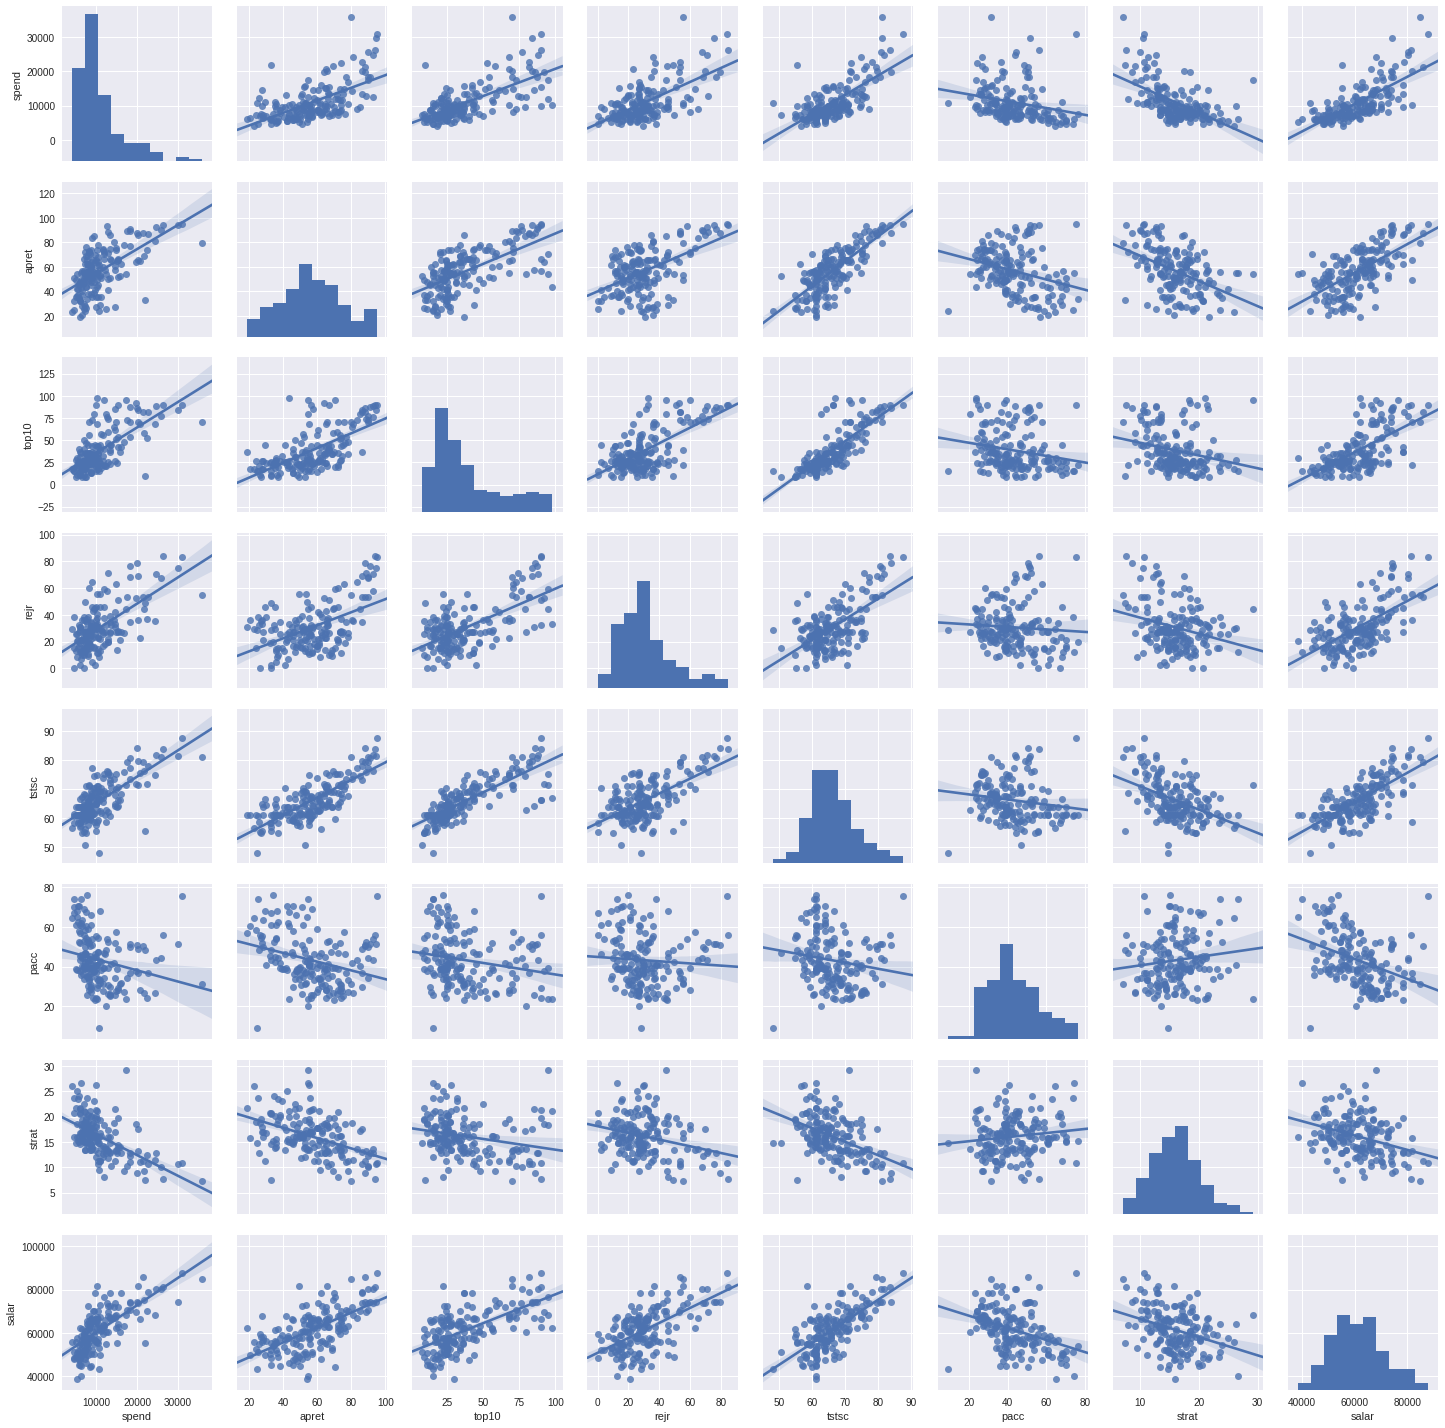

In [16]:
sns.pairplot(df, kind='reg')

In [17]:
lm = smf.ols(formula='apret ~ tstsc', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     264.8
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           2.36e-36
Time:                        23:12:10   Log-Likelihood:                -652.38
No. Observations:                 170   AIC:                             1309.
Df Residuals:                     168   BIC:                             1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.3999      8.288     -9.339      0.0

In [18]:
lm = smf.ols(formula='apret ~ salar', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           1.21e-20
Time:                        23:13:02   Log-Likelihood:                -688.78
No. Observations:                 170   AIC:                             1382.
Df Residuals:                     168   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2244      6.823     -2.231      0.0

In [19]:
lm = smf.ols(formula='apret ~ tstsc + salar', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           3.60e-36
Time:                        23:13:54   Log-Likelihood:                -649.73
No. Observations:                 170   AIC:                             1305.
Df Residuals:                     167   BIC:                             1315.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.9111      8.210     -9.246      0.0

In [20]:
lm = smf.ols(formula='apret ~ tstsc + salar + tstsc*salar', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     92.90
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           2.48e-35
Time:                        23:15:00   Log-Likelihood:                -649.05
No. Observations:                 170   AIC:                             1306.
Df Residuals:                     166   BIC:                             1319.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -19.8784     49.284     -0.403      

In [68]:
lm = smf.ols(formula='apret ~ spend	+	top10	+ rejr + tstsc + pacc	+ strat	+ salar', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     44.34
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           1.50e-34
Time:                        23:31:15   Log-Likelihood:                -641.84
No. Observations:                 170   AIC:                             1300.
Df Residuals:                     162   BIC:                             1325.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4135     15.759     -2.501      0.0

In [78]:
corrmat

,spend,apret,top10,rejr,tstsc,pacc,strat,salar
spend,1.000000,0.601231,0.675656,0.633544,0.714910,-0.236730,-0.561755,0.711838
apret,0.601231,1.000000,0.642464,0.514958,0.782183,-0.302834,-0.458311,0.635852
top10,0.675656,0.642464,1.000000,0.643163,0.798807,-0.207505,-0.247857,0.637648
rejr,0.633544,0.514958,0.643163,1.000000,0.628601,-0.071521,-0.283617,0.606777
tstsc,0.714910,0.782183,0.798807,0.628601,1.000000,-0.164223,-0.465226,0.715472
pacc,-0.236730,-0.302834,-0.207505,-0.071521,-0.164223,1.000000,0.131858,-0.375240
strat,-0.561755,-0.458311,-0.247857,-0.283617,-0.465226,0.131858,1.000000,-0.347673
salar,0.711838,0.635852,0.637648,0.606777,0.715472,-0.375240,-0.347673,1.000000


In [21]:
lm = smf.ols(formula='apret ~ tstsc + pacc	+ strat', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 26 Mar 2018   Prob (F-statistic):           7.11e-38
Time:                        23:18:24   Log-Likelihood:                -643.04
No. Observations:                 170   AIC:                             1294.
Df Residuals:                     166   BIC:                             1307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.7292     11.711     -3.905      0.0

In [69]:
lm = smf.ols(formula='apret ~ tstsc + pacc + tstsc*pacc', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           8.80e-38
Time:                        23:38:32   Log-Likelihood:                -643.25
No. Observations:                 170   AIC:                             1295.
Df Residuals:                     166   BIC:                             1307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.3216     25.968     -0.513      0.6

In [70]:
lm = smf.ols(formula='apret ~ tstsc + strat + tstsc*strat', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     91.51
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           5.38e-35
Time:                        23:39:12   Log-Likelihood:                -649.85
No. Observations:                 170   AIC:                             1308.
Df Residuals:                     166   BIC:                             1320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -58.3751     30.926     -1.888      

In [71]:
lm = smf.ols(formula='apret ~ pacc + strat + pacc*strat', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     21.30
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           1.01e-11
Time:                        23:40:54   Log-Likelihood:                -705.13
No. Observations:                 170   AIC:                             1418.
Df Residuals:                     166   BIC:                             1431.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.0261     16.027      5.118      0.0

In [7]:
lm = smf.ols(formula='apret ~ tstsc + pacc	+ strat + tstsc*pacc*strat', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     45.18
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           5.60e-35
Time:                        03:04:24   Log-Likelihood:                -640.79
No. Observations:                 170   AIC:                             1298.
Df Residuals:                     162   BIC:                             1323.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -13.6821    116.189  

In [72]:
lm = smf.ols(formula='apret ~ tstsc + pacc	+ strat + tstsc*pacc', data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  apret   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     79.58
Date:                Wed, 21 Mar 2018   Prob (F-statistic):           1.72e-37
Time:                        23:42:41   Log-Likelihood:                -641.46
No. Observations:                 170   AIC:                             1293.
Df Residuals:                     165   BIC:                             1309.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4215     26.205     -0.169      0.8